# SPANet DP & AP_max Output Statistics

In [1]:
import itertools
import logging
from pathlib import Path
import numba as nb

import awkward as ak
import click
import h5py as h5
import numpy as np
import vector

from coffea.hist.plot import clopper_pearson_interval
import matplotlib.pyplot as plt

# from src.data.cms.convert_to_h5 import MIN_JETS, N_JETS, N_FJETS

vector.register_awkward()

logging.basicConfig(level=logging.INFO)

/Users/billyli/miniforge_x86_new/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
# read test target file
test_file = "//Users/billyli/UCSD/hhh/reports/bv2/hhh_test.h5"
test_h5 = h5.File(test_file)

# read baseline prediction
baseline_file = "//Users/billyli/UCSD/hhh/reports/bv2/pred_baseline.h5"
b_h5 = h5.File(baseline_file)

# read spanet prediction
spanet_file = "//Users/billyli/UCSD/hhh/reports/bv2/dp_on/pred_v53.h5"
s_h5 = h5.File(spanet_file)

In [19]:
h1ap = np.array(s_h5['TARGETS']['h1']['assignment_probability'])
h2ap = np.array(s_h5['TARGETS']['h2']['assignment_probability'])
h3ap = np.array(s_h5['TARGETS']['h3']['assignment_probability'])

h1dp = np.array(s_h5['TARGETS']['h1']['detection_probability'])
h2dp = np.array(s_h5['TARGETS']['h2']['detection_probability'])
h3dp = np.array(s_h5['TARGETS']['h3']['detection_probability'])

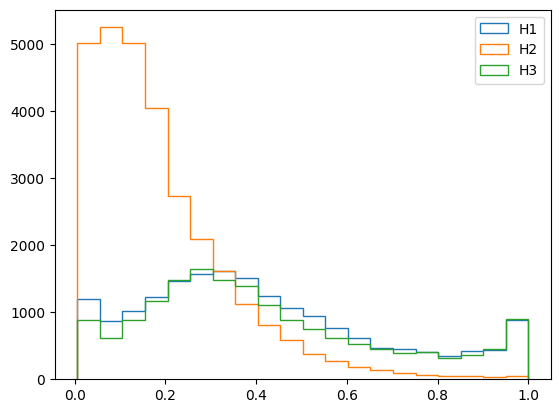

In [23]:
dpMin=0.5
apMin=1/(13*13)
h1mask = (h1dp>dpMin)&(h1ap>apMin)
h2mask = (h2dp>dpMin)&(h2ap>apMin)
h3mask = (h3dp>dpMin)&(h3ap>apMin)

fig, ax = plt.subplots(1,1)
ax.hist(h1ap[h1mask], bins=20, label='H1', histtype='step')
ax.hist(h2ap[h2mask], bins=20, label='H2', histtype='step')
ax.hist(h3ap[h3mask], bins=20, label='H3', histtype='step')
ax.legend()
plt.show()

In [31]:
print(h1mask.sum(), h2mask.sum(), h3mask.sum())

18508 29602 16710


In [26]:
h1pt = np.array(test_h5['TARGETS']['h1']['pt'])
h2pt = np.array(test_h5['TARGETS']['h1']['pt'])
h3pt = np.array(test_h5['TARGETS']['h1']['pt'])

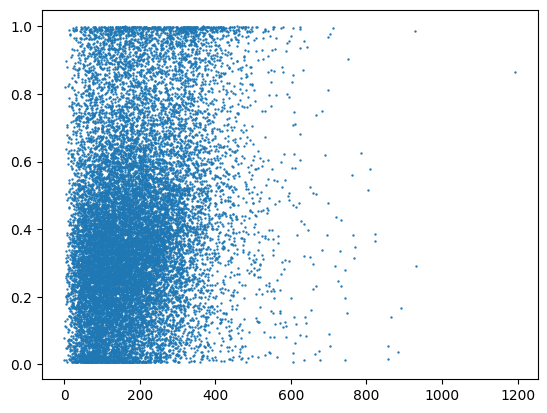

In [38]:
plt.scatter(h1pt[h1mask], h1ap[h1mask], s=0.5)

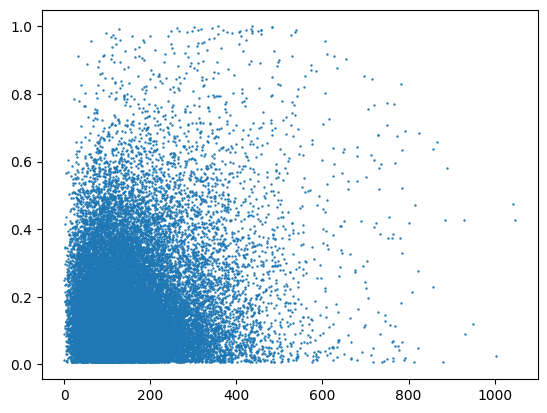

In [37]:
plt.scatter(h2pt[h2mask], h2ap[h2mask], s=0.5)

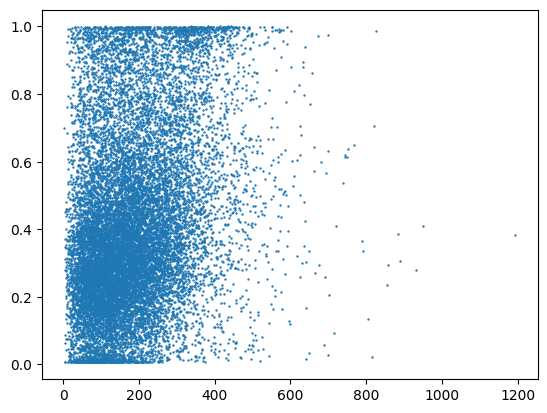

In [36]:
plt.scatter(h3pt[h3mask], h3ap[h3mask], s=0.5)

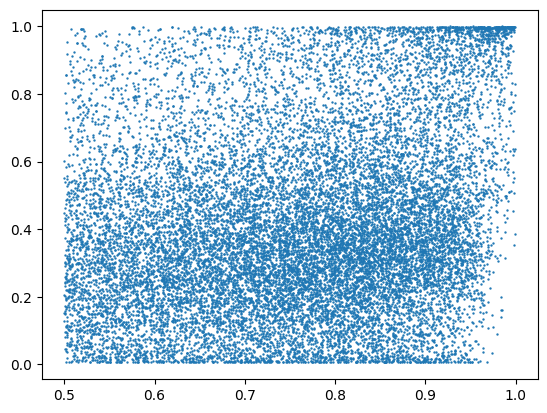

In [35]:
plt.scatter(h1dp[h1mask], h1ap[h1mask], s=0.5)

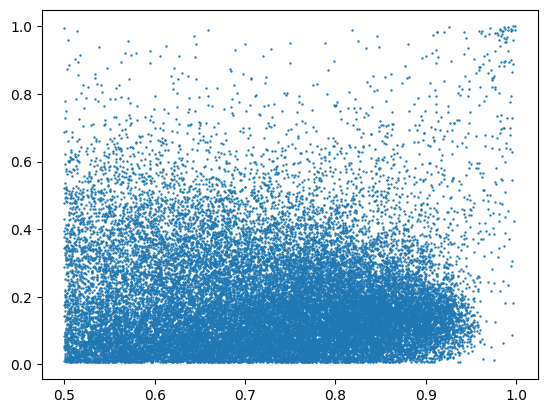

In [40]:
plt.scatter(h2dp[h2mask], h2ap[h2mask], s=0.5)

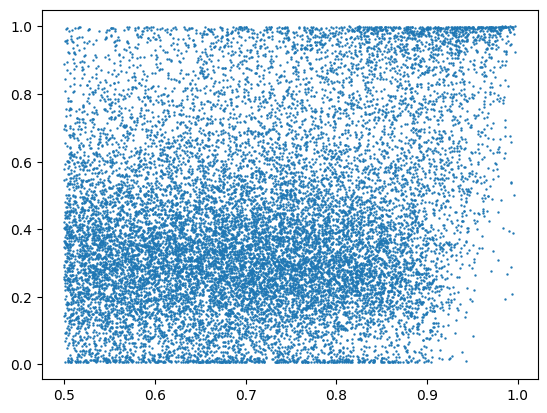

In [41]:
plt.scatter(h3dp[h3mask], h3ap[h3mask], s=0.5)

## DP1 > DP2 > DP3?

In [46]:
greater = h1dp[h1mask&h2mask]>h2dp[h1mask&h2mask]
greater.sum()/greater.shape[0]

0.6572259941804074

In [47]:
greater = h2dp[h2mask&h3mask]>h3dp[h2mask&h3mask]
greater.sum()/greater.shape[0]

0.6895750785626452

In [48]:
greater = h1dp[h1mask&h3mask]>h3dp[h1mask&h3mask]
greater.sum()/greater.shape[0]

0.7360464166053772

## AP1 > AP2 > AP3?

In [49]:
greater = h1ap[h1mask&h2mask]>h2ap[h1mask&h2mask]
greater.sum()/greater.shape[0]

0.8017458777885548

In [50]:
greater = h2ap[h2mask&h3mask]>h3ap[h2mask&h3mask]
greater.sum()/greater.shape[0]

0.18718404153572893

In [51]:
greater = h1ap[h1mask&h3mask]>h3ap[h1mask&h3mask]
greater.sum()/greater.shape[0]

0.4937484677617063

In [54]:
no_reco = 1-h1ap*h1dp-h2ap*h2dp-h3ap*h3dp

In [56]:
np.argmax([h1ap*h1dp, h2ap*h2dp, h3ap*h3dp, no_reco], axis=0)

array([3, 0, 3, ..., 3, 2, 3])